In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bowling_df = pd.read_csv('/content/bowling_summary.csv')
batting_df = pd.read_csv('/content/batting_summary.csv')


**1.Get the info about bowling and batting data frame**

In [ ]:

print("/content/bowling_summary.csv")
print(bowling_df.info())

print("/content/bowling_summary.csv")
print(batting_df.info())


/content/bowling_summary.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_no       574 non-null    int64  
 1   Match_Between  574 non-null    object 
 2   Bowling_Team   574 non-null    object 
 3   Bowler_Name    574 non-null    object 
 4   Overs          574 non-null    float64
 5   Maidens        574 non-null    int64  
 6   Runs           574 non-null    int64  
 7   Wickets        574 non-null    int64  
 8   Economy        574 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 40.5+ KB
None
/content/bowling_summary.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    obje

2.Get the maiden over for the top 10 bowlers

In [ ]:


# Group by bowler and team to aggregate stats
top_10_maidens = bowling_df.groupby(['Bowler_Name', 'Bowling_Team']).agg({
    'Overs': 'sum',
    'Maidens': 'sum',
    'Wickets': 'sum',
    'Runs': 'sum'
}).reset_index()

# Sort by total maidens in descending order
top_10_maidens = top_10_maidens.sort_values(by='Maidens', ascending=False).head(10)

# Reset index and display the result
top_10_maidens.reset_index(drop=True, inplace=True)
print(top_10_maidens)


        Bowler_Name  Bowling_Team  Overs  Maidens  Wickets  Runs
0    Jasprit Bumrah         India   91.5        9       20   373
1    Josh Hazlewood     Australia   93.1        8       16   449
2     Kagiso Rabada  South Africa   72.5        7       13   364
3        Aryan Dutt   Netherlands   77.3        6       10   426
4      David Willey       England   51.0        6       11   259
5       Lungi Ngidi  South Africa   59.9        6       10   355
6    Mohammed Siraj         India   82.3        6       14   469
7       Trent Boult   New Zealand   91.0        6       14   504
8  Mitchell Santner   New Zealand   92.4        4       16   449
9     Mohammad Nabi   Afghanistan   61.3        4        8   254


3.Plot the appropriate graph for the Top 10 Bowlers with most maidens over



<ipython-input-11-da6f6353df8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maidens', y='Bowler_Name', data=top_maidens, palette='Blues_d')


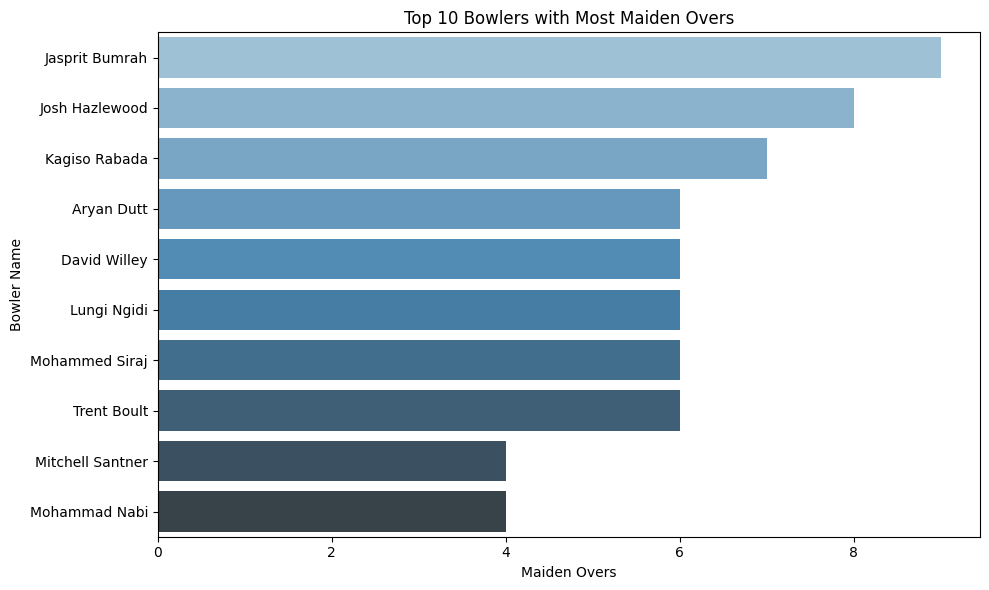

In [ ]:
top_maidens = bowling_df.groupby(['Bowler_Name']).agg({
    'Maidens': 'sum'
}).sort_values(by='Maidens', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Maidens', y='Bowler_Name', data=top_maidens, palette='Blues_d')
plt.title('Top 10 Bowlers with Most Maiden Overs')
plt.xlabel('Maiden Overs')
plt.ylabel('Bowler Name')
plt.tight_layout()
plt.show()

5.List the Bowlers name having Top 10 concede Runs and also show the visualization
with an appropriate graph along with a color scale

<ipython-input-12-c4968343179a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runs', y='Bowler_Name', data=top_runs, palette='Reds')


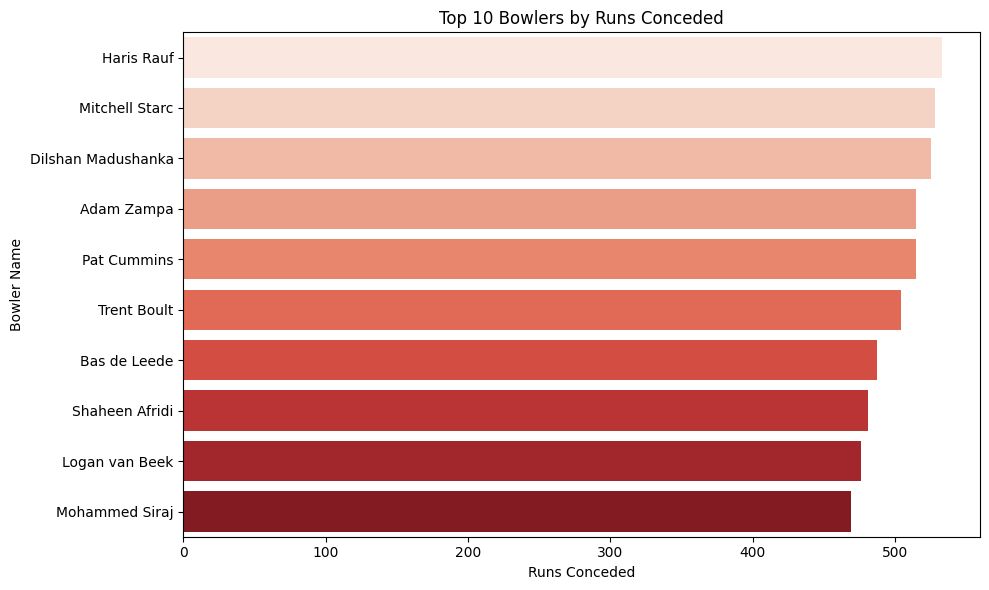

In [ ]:
top_runs = bowling_df.groupby(['Bowler_Name']).agg({
    'Runs': 'sum'
}).sort_values(by='Runs', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Runs', y='Bowler_Name', data=top_runs, palette='Reds')
plt.title('Top 10 Bowlers by Runs Conceded')
plt.xlabel('Runs Conceded')
plt.ylabel('Bowler Name')
plt.tight_layout()
plt.show()

6.List the Top 10 Bowlers name who has taken maximum wickets in the descending
order and also show the visualization using an appropriate graph along with a color
scale

<ipython-input-13-d3a20f96e5e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wickets', y='Bowler_Name', data=top_wickets, palette='Greens')


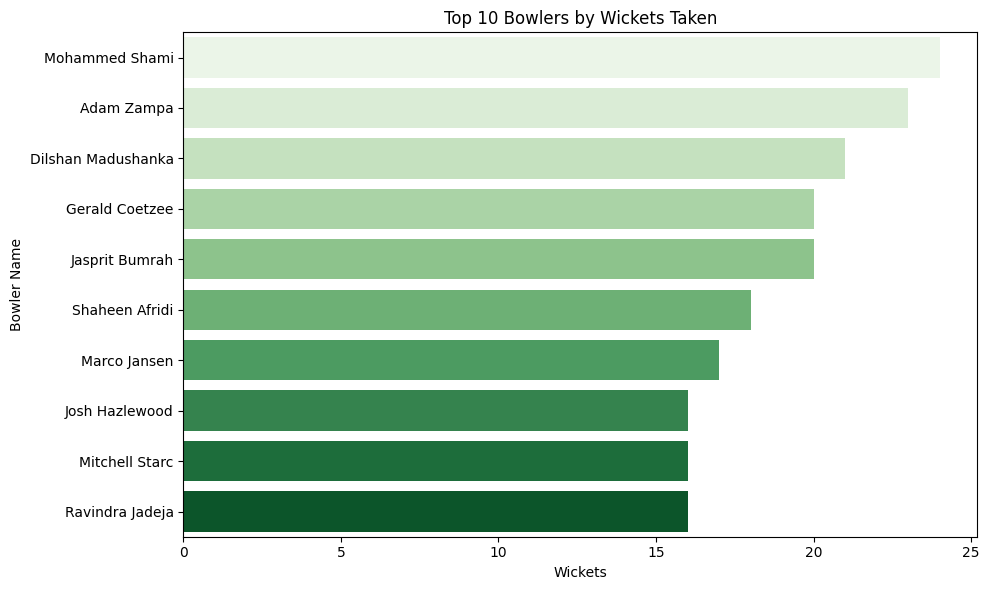

In [ ]:
top_wickets = bowling_df.groupby(['Bowler_Name']).agg({
    'Wickets': 'sum'
}).sort_values(by='Wickets', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Wickets', y='Bowler_Name', data=top_wickets, palette='Greens')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets')
plt.ylabel('Bowler Name')
plt.tight_layout()
plt.show()

7.List the Top 10 Batsman names with maximum runs in the descending order and also
show the visualization using an appropriate graph along with a color scale

In [ ]:
top_10_runs = batting_df.groupby("Batsman_Name")["Runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = sns.color_palette("YlOrRd", 10)
sns.barplot(x=top_10_runs.index, y=top_10_runs.values, palette=colors)
plt.title("Top 10 Batsmen by Total Runs")
plt.ylabel("Total Runs")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8.List the Top 10 Batsman names with most sixers in the descending order and also
show the visualization using an appropriate graph along with a color scale

In [ ]:
top_10_sixes = batting_df.groupby("Batsman_Name")["6s"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = sns.color_palette("Blues", 10)
sns.barplot(x=top_10_sixes.index, y=top_10_sixes.values, palette=colors)
plt.title("Top 10 Batsmen by Sixes")
plt.ylabel("Number of Sixes")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


9.List the Top 10 Batsman names with most Fours in the descending order and also
show the visualization using an appropriate graph along with a color scale

In [ ]:
top_10_fours = batting_df.groupby("Batsman_Name")["4s"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = sns.color_palette("Purples", 10)
sns.barplot(x=top_10_fours.index, y=top_10_fours.values, palette=colors)
plt.title("Top 10 Batsmen by Fours")
plt.ylabel("Number of Fours")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


10/ Show the visualization using bar graph for the number of matches won by different
country in the descending order

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your match results CSV
match_df = pd.read_csv("/content/sample_data/match_schedule_results.csv")

# Count number of matches won by each country
wins_by_team = match_df['Winner'].value_counts().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=wins_by_team.index, y=wins_by_team.values, palette="Set2")
plt.title("Number of Matches Won by Each Country")
plt.xlabel("Country")
plt.ylabel("Matches Won")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


9. List the Top 10 Batsman names who has scored maximum runs also visualize through
appropriate graph

In [ ]:
import pandas as pd

# Load the CSV file to analyze the batting summary data
file_path = '/content/sample_data/batting_summary.csv'
df = pd.read_csv(file_path)

# Grouping by batsman name and summing the runs to get total runs for each batsman
top_batsmen = df.groupby('Batsman_Name')['Runs'].sum().sort_values(ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_batsmen.plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsman Name')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


10.Plot the appropriate graph for all the batsmen for how many runs and balls faced in
how many seconds.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file to analyze the batting summary data
df = pd.read_csv('/content/sample_data/batting_summary.csv')

# Grouping by batsman name and summing the runs and balls faced
batsman_summary = df.groupby('Batsman_Name').agg({'Runs': 'sum', 'Balls': 'sum'}).reset_index()

# Plotting the data using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(batsman_summary['Balls'], batsman_summary['Runs'], color='green', alpha=0.6)

# Adding labels and title
plt.title('Runs vs Balls Faced by Batsmen')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')

# Display the plot
plt.tight_layout()
plt.show()


11.Display the total number of matches played in the world cup

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('batting_summary.csv')

# Count the unique match numbers
total_matches = df['Match_no'].nunique()

print("Total number of matches played in the World Cup:", total_matches)


13. Total number of matches in each venue (with horizontal bar graph)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (ensure correct path if running locally)
match_df = pd.read_csv('/content/match_schedule_results.csv')

# Check that 'Venue' column exists
print(match_df.columns)

# Count the number of matches in each venue
matches_per_venue = match_df['Venue'].value_counts()

# Plotting the result
plt.figure(figsize=(10, 6))
matches_per_venue.plot(kind='barh', color='lightseagreen')
plt.title('Total Number of Matches in Each Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()


14. List the Teams that Have Participated in the World Cup


In [ ]:
import pandas as pd

# Load the match schedule dataset
match_df = pd.read_csv('/content/match_schedule_results.csv')

# Extract unique teams from both Team1 and Team2 columns
teams = pd.unique(match_df[['Team1', 'Team2']].values.ravel('K'))

# Sort and display
teams = sorted(teams)
print("Teams that have participated in the World Cup:")
for team in teams:
    print("-", team)


FileNotFoundError: [Errno 2] No such file or directory: '/content/match_schedule_results.csv'

15. Visualize number of matches won by each team


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the match_schedule_results dataset
match_df = pd.read_csv('/content/match_schedule_results.csv')

matches_won = match_df['Winner'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
matches_won.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team' )
plt.ylabel('Matches Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


16. Show the visualization using appropriate plotting the total innings played by each
team


In [ ]:
batting_df = pd.read_csv('/content/batting_summary.csv')

innings_played = batting_df.groupby('Team_Innings')['Match_no'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
innings_played.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Total Innings Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Innings Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/batting_summary.csv'

17.Plot the appropriate graph to get how many times the match is won or lost or tied
against different countries with opposition countries.

In [ ]:
def get_match_results(row):
    team1 = row['Team1']
    team2 = row['Team2']
    winner = row['Winner']
    if winner == 'Tie':
        return [(team1, team2, 'Tie'), (team2, team1, 'Tie')]
    elif winner == team1:
        return [(team1, team2, 'Won'), (team2, team1, 'Lost')]
    elif winner == team2:
        return [(team1, team2, 'Lost'), (team2, team1, 'Won')]
    else:
        return [(team1, team2, 'No Result'), (team2, team1, 'No Result')]

# Build results dataset
results_data = []
for _, row in match_df.iterrows():
    results_data.extend(get_match_results(row))

results_df = pd.DataFrame(results_data, columns=['Team', 'Opponent', 'Result'])

# Group by team and result
result_summary = results_df.groupby(['Team', 'Result']).size().unstack(fill_value=0)

# Plot stacked bar chart
result_summary.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel2', edgecolor='black')
plt.title('Match Outcomes per Team (Won, Lost, Tie)')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()